# Importing packages and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Load the data set
data = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Logistic Regression/bank-full.csv",delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Dividing our data into input and output variables 
X = data.iloc[:,0:16]
Y = data.iloc[:,16]
Y = Y.map(dict(yes=1, no=0))

In [5]:
# as we have column with object type data, we need to create separate dummy columns in order to go ahead with logistic regression
# we do not have null as entries in any rows so no need to delete any rows
X=pd.get_dummies(X)
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
data_new = X.join(Y)
data_new

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [8]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [10]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [11]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [12]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)


[[39131   791]
 [ 4106  1183]]


In [13]:
classifier.score(X,Y)


0.891685651721926

In [14]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [15]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

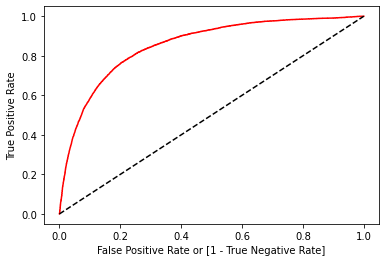

In [16]:

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [17]:
auc

0.6019290675050418

# After seeing the confusion matrix TP = 39191 and TN = 1184, Which clearly indicates that our model will be biased towards TP more

### In order to create a more balanced model lets create a model that takes equal no. of rows with y as yes and same number of y as noes

In [18]:
datay = data_new[data_new['y'] == 1]
datan = data_new[data_new['y'] == 0]

In [19]:
datay

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
83,59,2343,5,1042,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
86,56,45,5,1467,1,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
87,41,1270,5,1389,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
129,55,2476,5,579,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
168,54,184,5,673,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,2850,17,300,1,40,8,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [20]:
datan = datan.sample(n=5290)
datan

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
25053,38,193,18,191,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
33317,41,1314,20,159,1,326,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
36370,38,946,11,69,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
20744,45,6542,13,93,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18696,42,0,31,58,36,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,33,0,2,72,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39693,51,2239,27,1576,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
18194,46,37,30,239,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42762,66,908,28,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
data = pd.concat([datay,datan])
data = data.sample(frac=1)
data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
16107,51,0,22,176,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41590,29,345,16,106,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
31790,60,12039,8,236,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
954,43,87,7,328,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
44272,36,1451,23,192,4,93,17,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42774,36,3949,28,130,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
25194,52,507,18,123,2,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
33446,25,319,20,48,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28741,36,4148,30,193,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Dividing our data into input and output variables 
X = data.iloc[:,0:51]
Y = data.iloc[:,51]

In [23]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [25]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [26]:
y_pred_df

,actual,predicted_prob
16107,0,0
41590,0,1
31790,1,1
954,0,0
44272,1,1
...,...,...
42774,1,0
25194,0,0
33446,0,0
28741,0,0


In [28]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)


[[4216 1074]
 [1049 4240]]


In [29]:
classifier.score(X,Y)


0.7993194063711125

In [30]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      5290
           1       0.80      0.80      0.80      5289

    accuracy                           0.80     10579
   macro avg       0.80      0.80      0.80     10579
weighted avg       0.80      0.80      0.80     10579



Text(0, 0.5, 'True Positive Rate')

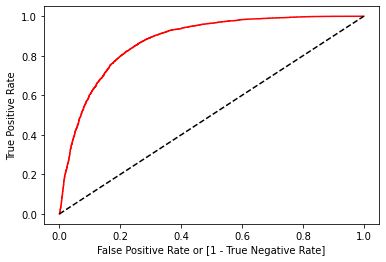

In [31]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [32]:
auc

0.7993196279613035

# Classification report indicates that the precision as well as recall is improved in the model which is also supported by increased area under the curve(AUC)
## Hence we have improved our Logistic Model to give better results

# Using this model to predict y for original dataset

In [33]:
data = pd.read_csv("C:/Users/HP/Desktop/ExcelR/Data Science/Python/Assignments/Logistic Regression/bank-full.csv",delimiter=';')
X = data.iloc[:,0:16]
Y = data.iloc[:,16]
Y = Y.map(dict(yes=1, no=0))
X=pd.get_dummies(X)


In [34]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [35]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [36]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,1


In [37]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)


[[32202  7720]
 [ 1049  4240]]


In [38]:
classifier.score(X,Y)


0.8060427772002389

In [39]:
#Classification report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     39922
           1       0.35      0.80      0.49      5289

    accuracy                           0.81     45211
   macro avg       0.66      0.80      0.69     45211
weighted avg       0.90      0.81      0.83     45211



Text(0, 0.5, 'True Positive Rate')

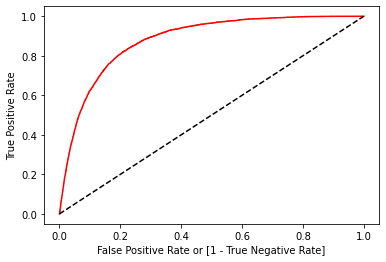

In [40]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [41]:
auc

0.8041433726377137